In [29]:
from __future__ import print_function
import time

import numpy as np
import pandas as pd
import torch
from torchvision import datasets, transforms

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns

In [30]:
transform=transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
    ])
dataset1 = datasets.MNIST('../data', train=True, download=True,
                   transform=transform)

Extracting ../data\MNIST\raw\train-images-idx3-ubyte.gz to ../data\MNIST\raw



Extracting ../data\MNIST\raw\train-labels-idx1-ubyte.gz to ../data\MNIST\raw


Extracting ../data\MNIST\raw\t10k-images-idx3-ubyte.gz to ../data\MNIST\raw


Extracting ../data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ../data\MNIST\raw
Processing...
Done!


In [60]:
sample = dataset1[0][0][0].numpy()
samples = np.asarray([sample[0][0].numpy().flatten() for sample in dataset1])
targets = np.asarray([sample[1] for sample in dataset1])

<Figure size 432x288 with 0 Axes>

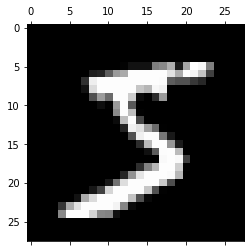

In [44]:
plt.gray()
fig, ax = plt.subplots()
ax.matshow(sample)

In [62]:
X = samples[:10000]

In [54]:
tsne = TSNE(n_components = 2, verbose = 1, perplexity = 40)

In [64]:
tsne_results = tsne.fit_transform(X)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 2.231s...
[t-SNE] Computed neighbors for 10000 samples in 153.602s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 6.054183
[t-SNE] KL divergence after 250 iterations with early exaggeration: 85.306488
[t-SNE] KL divergence after 1000 iterations: 1.719165


In [65]:
tsne_results.shape

(10000, 2)

In [69]:
df = pd.DataFrame()

In [73]:
df['one'] = tsne_results[:, 0]
df['two'] = tsne_results[:, 1]
df['y']   = targets[:10000]

<AxesSubplot:xlabel='one', ylabel='two'>

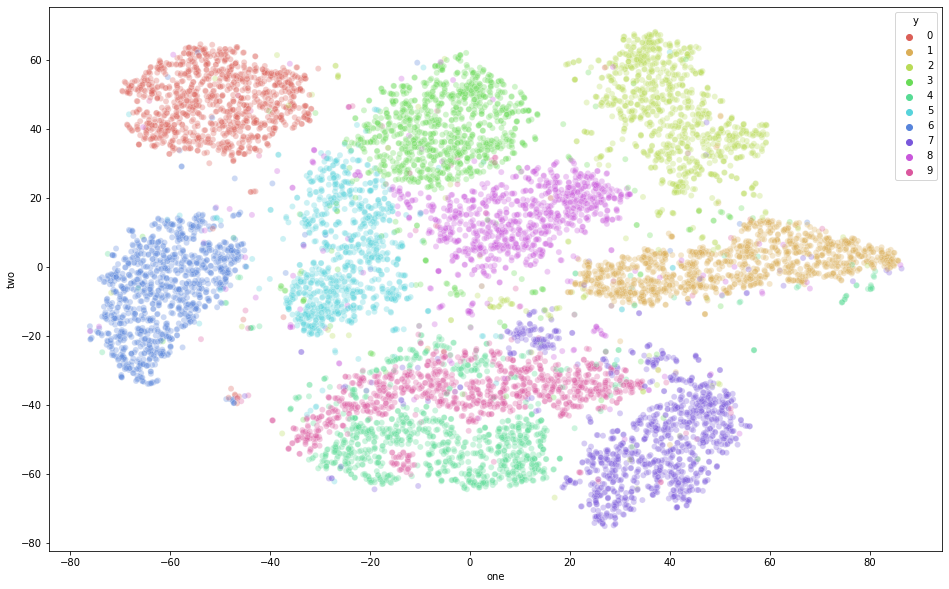

In [74]:
plt.figure(figsize = (16, 10))
sns.scatterplot(
    x = 'one', y = 'two',
    hue = 'y',
    palette = sns.color_palette('hls', 10),
    data = df,
    legend = 'full',
    alpha = 0.3
)

In [86]:
pca = PCA(n_components =  int(28*28/2))
pca_result = pca_50.fit_transform(X)

In [87]:
print(np.sum(pca_50.explained_variance_ratio_))

0.99562293


In [91]:
tsne_pca_results = tsne.fit_transform(pca_result)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 1.012s...
[t-SNE] Computed neighbors for 10000 samples in 91.431s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 6.134177
[t-SNE] KL divergence after 250 iterations with early exaggeration: 85.443100
[t-SNE] KL divergence after 1000 iterations: 1.719896
